In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import re

def parse_drm_results(file_path):
    """Parses the file with results and returns a DataFrame."""
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Match rank and loss
            rank_match = re.match(r"Rank (\d+), loss = ([\-\d\.eE]+)", line)
            if rank_match:
                rank = int(rank_match.group(1))
                loss = float(rank_match.group(2))
                data.append({"Rank": rank, "Loss": loss})
            # Match hyperparameters
            act_fn_match = re.match(r"\s+act_fn: (.+)", line)
            width_match = re.match(r"\s+width: (\d+)", line)
            n_blocks_match = re.match(r"\s+n_blocks: (\d+)", line)
            lr_match = re.match(r"\s+lr: ([\d\.eE\-]+)", line)

            if act_fn_match:
                data[-1]["ActFn"] = act_fn_match.group(1)
            if width_match:
                data[-1]["Width"] = int(width_match.group(1))
            if n_blocks_match:
                data[-1]["NBlocks"] = int(n_blocks_match.group(1))
            if lr_match:
                data[-1]["LR"] = float(lr_match.group(1))

    return pd.DataFrame(data)

In [49]:
def parse_pinn_results(file_path):
    """Parses the file with results and returns a DataFrame."""
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            # Match rank and loss
            rank_match = re.match(r"Rank (\d+), loss = ([\-\d\.eE]+)", line)
            if rank_match:
                rank = int(rank_match.group(1))
                loss = float(rank_match.group(2))
                data.append({"Rank": rank, "Loss": loss})
            # Match hyperparameters
            act_fn_match = re.match(r"\s+act_fn: (.+)", line)
            width_match = re.match(r"\s+width: (\d+)", line)
            depth_match = re.match(r"\s+depth: (\d+)", line)
            lr_match = re.match(r"\s+lr: ([\d\.eE\-]+)", line)
            
            if act_fn_match:
                data[-1]["ActFn"] = act_fn_match.group(1)
            if width_match:
                data[-1]["Width"] = int(width_match.group(1))
            if depth_match:
                data[-1]["Depth"] = int(depth_match.group(1))
            if lr_match:
                data[-1]["LR"] = float(lr_match.group(1))
                
    return pd.DataFrame(data)

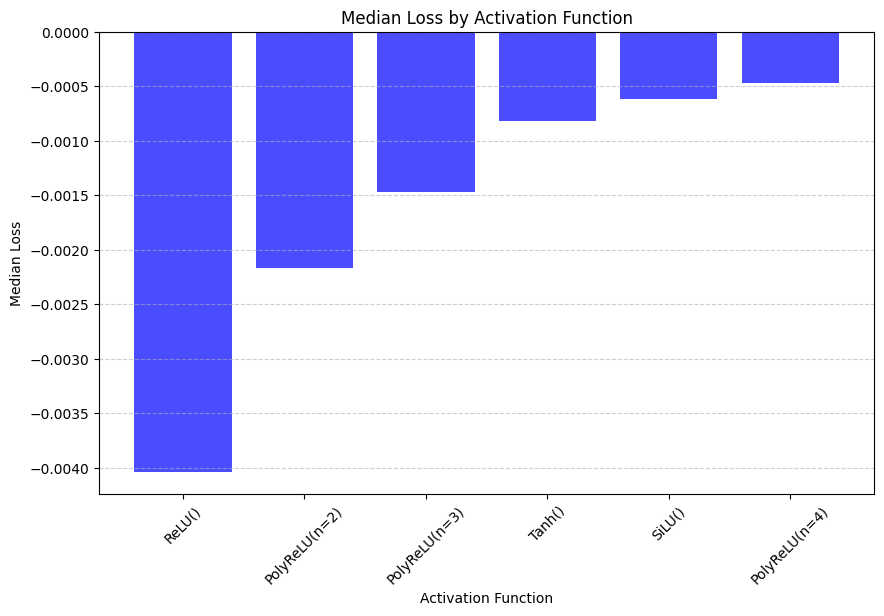

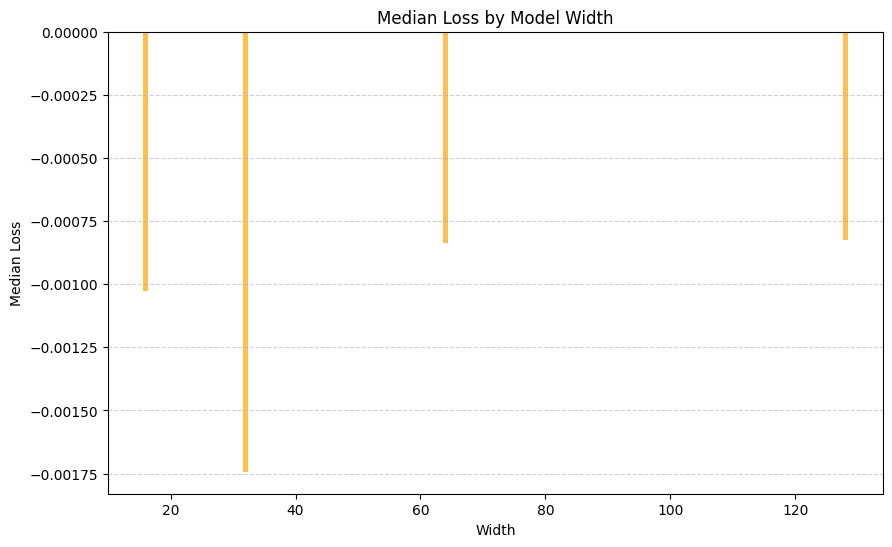

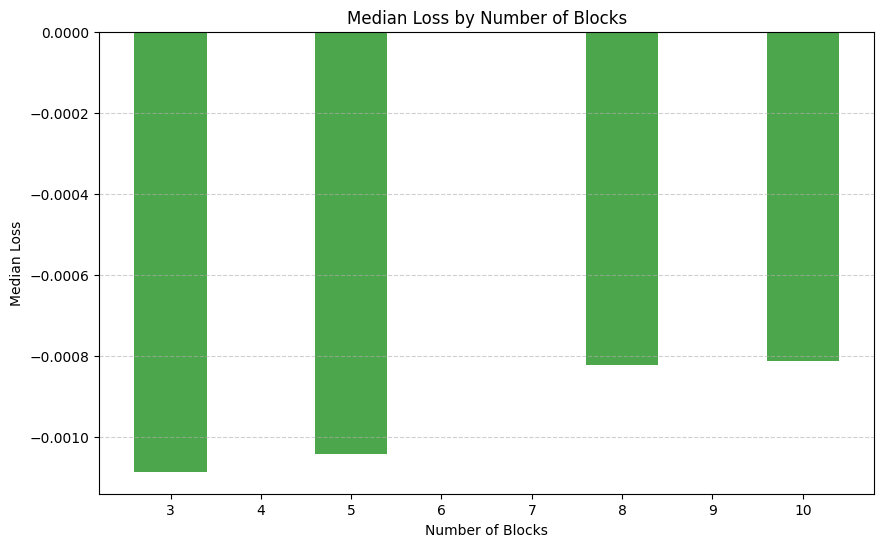

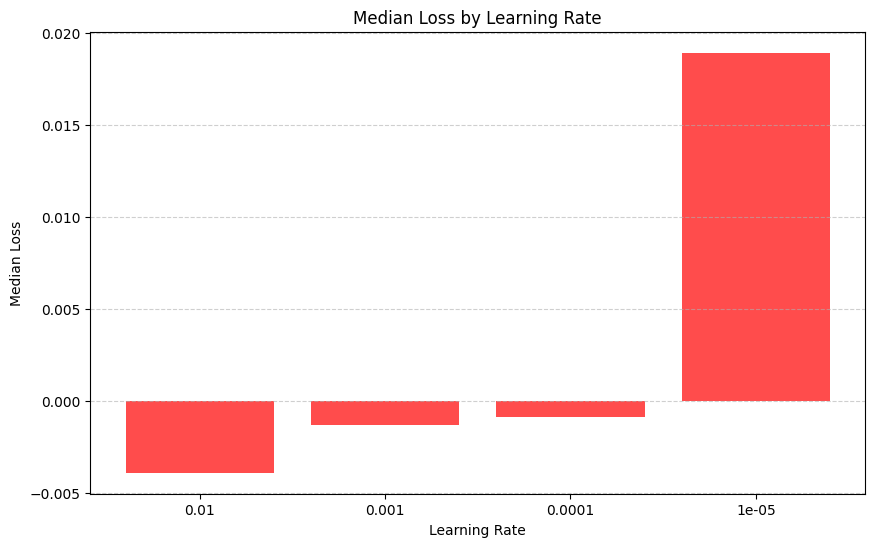

In [39]:
# Example usage
# Replace 'results.txt' with the path to your file
file_path = 'random_search_results_drm_2d_laplacian.txt'
df = parse_drm_results(file_path)

# Analyze the impact of each hyperparameter
# Group by activation function
act_fn_median = df.groupby("ActFn")["Loss"].median().sort_values()

# Group by width
width_median = df.groupby("Width")["Loss"].median().sort_index()

# Group by number of blocks
nblocks_median = df.groupby("NBlocks")["Loss"].median().sort_index()

# Group by learning rate
lr_median = df.groupby("LR")["Loss"].median().sort_index(ascending=False)

# Plotting
# Activation Function
plt.figure(figsize=(10, 6))
plt.bar(act_fn_median.index, act_fn_median, color="blue", alpha=0.7)
plt.title("Median Loss by Activation Function")
plt.ylabel("Median Loss")
plt.xlabel("Activation Function")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Width
plt.figure(figsize=(10, 6))
plt.bar(width_median.index, width_median, color="orange", alpha=0.7)
plt.title("Median Loss by Model Width")
plt.ylabel("Median Loss")
plt.xlabel("Width")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Number of Blocks
plt.figure(figsize=(10, 6))
plt.bar(nblocks_median.index, nblocks_median, color="green", alpha=0.7)
plt.title("Median Loss by Number of Blocks")
plt.ylabel("Median Loss")
plt.xlabel("Number of Blocks")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Learning Rate
plt.figure(figsize=(10, 6))
plt.bar(lr_median.index.astype(str), lr_median, color="red", alpha=0.7)
plt.title("Median Loss by Learning Rate")
plt.ylabel("Median Loss")
plt.xlabel("Learning Rate")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


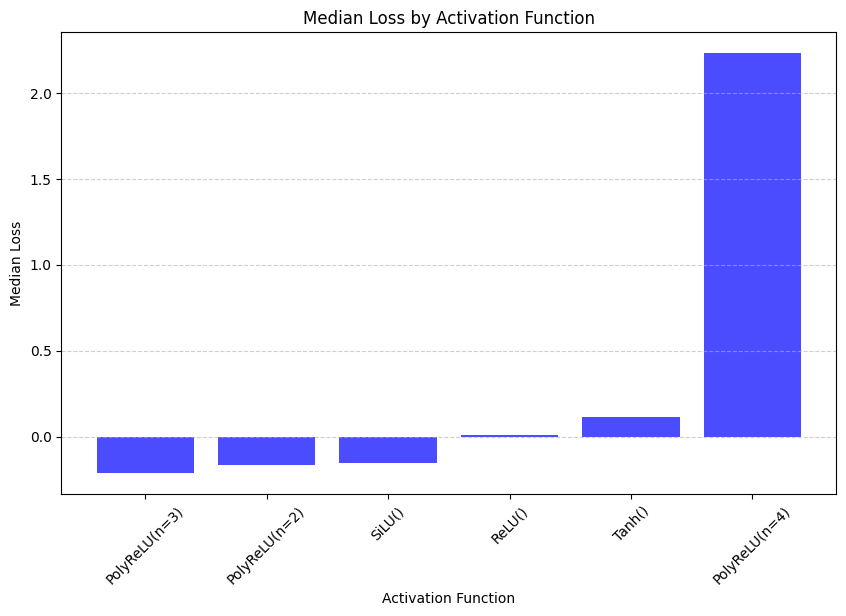

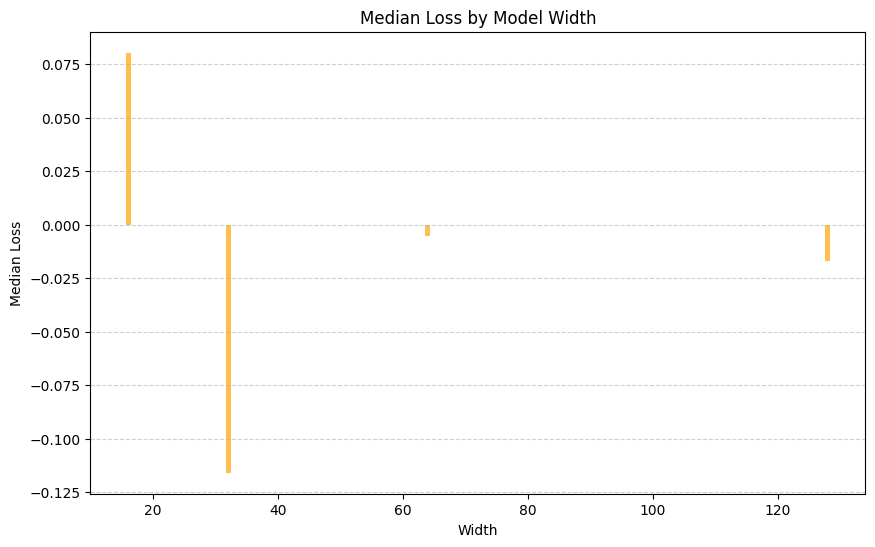

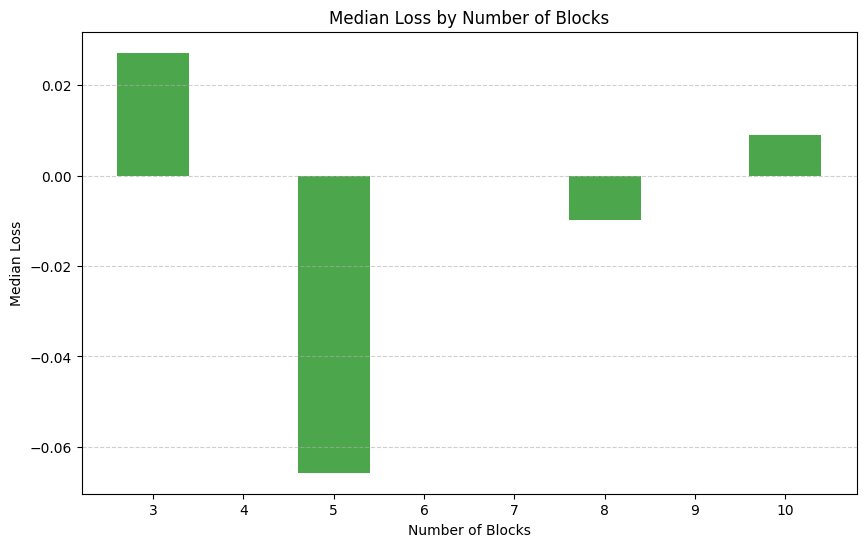

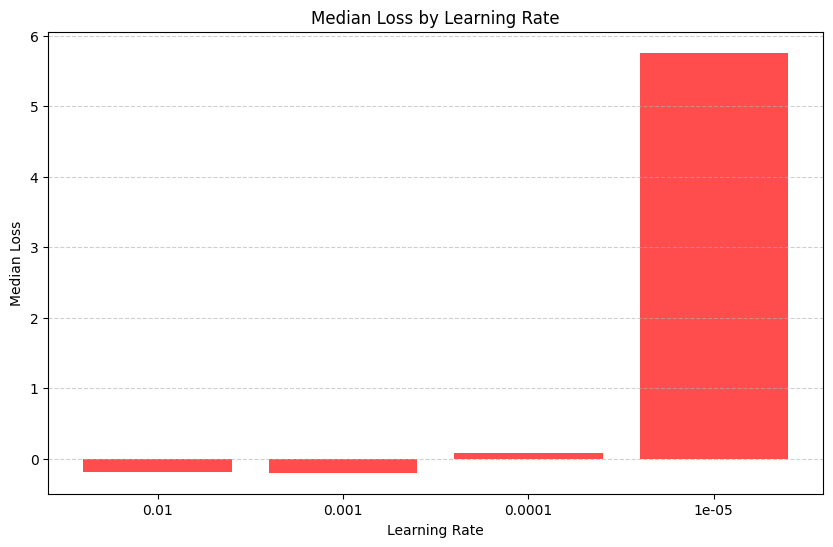

In [40]:
file_path = 'random_search_results_drm_problem1.txt'
df = parse_drm_results(file_path)

# Analyze the impact of each hyperparameter
# Group by activation function
act_fn_median = df.groupby("ActFn")["Loss"].median().sort_values()

# Group by width
width_median = df.groupby("Width")["Loss"].median().sort_index()

# Group by number of blocks
nblocks_median = df.groupby("NBlocks")["Loss"].median().sort_index()

# Group by learning rate
lr_median = df.groupby("LR")["Loss"].median().sort_index(ascending=False)

# Plotting
# Activation Function
plt.figure(figsize=(10, 6))
plt.bar(act_fn_median.index, act_fn_median, color="blue", alpha=0.7)
plt.title("Median Loss by Activation Function")
plt.ylabel("Median Loss")
plt.xlabel("Activation Function")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Width
plt.figure(figsize=(10, 6))
plt.bar(width_median.index, width_median, color="orange", alpha=0.7)
plt.title("Median Loss by Model Width")
plt.ylabel("Median Loss")
plt.xlabel("Width")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Number of Blocks
plt.figure(figsize=(10, 6))
plt.bar(nblocks_median.index, nblocks_median, color="green", alpha=0.7)
plt.title("Median Loss by Number of Blocks")
plt.ylabel("Median Loss")
plt.xlabel("Number of Blocks")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Learning Rate
plt.figure(figsize=(10, 6))
plt.bar(lr_median.index.astype(str), lr_median, color="red", alpha=0.7)
plt.title("Median Loss by Learning Rate")
plt.ylabel("Median Loss")
plt.xlabel("Learning Rate")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


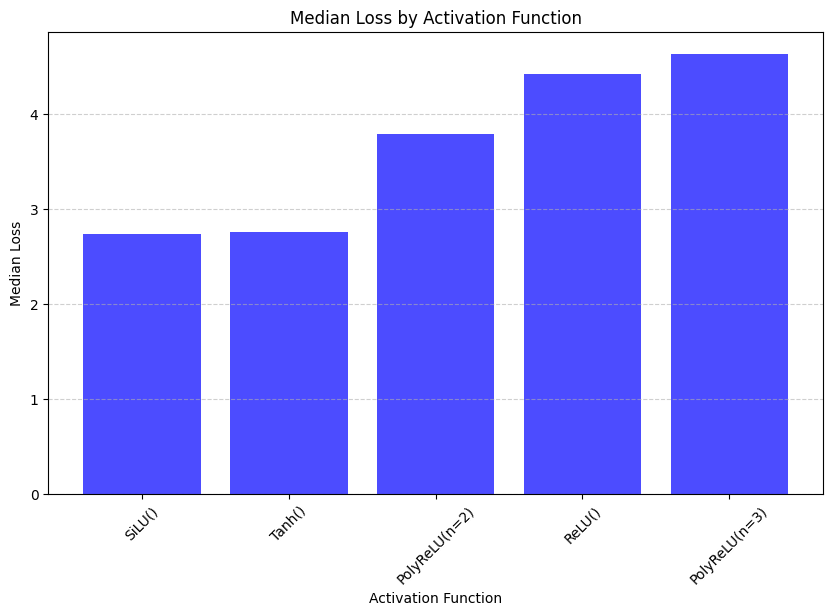

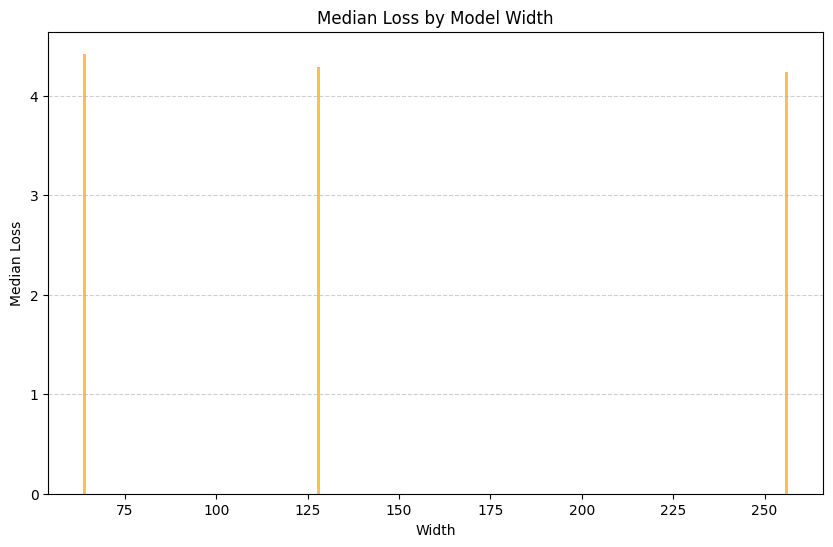

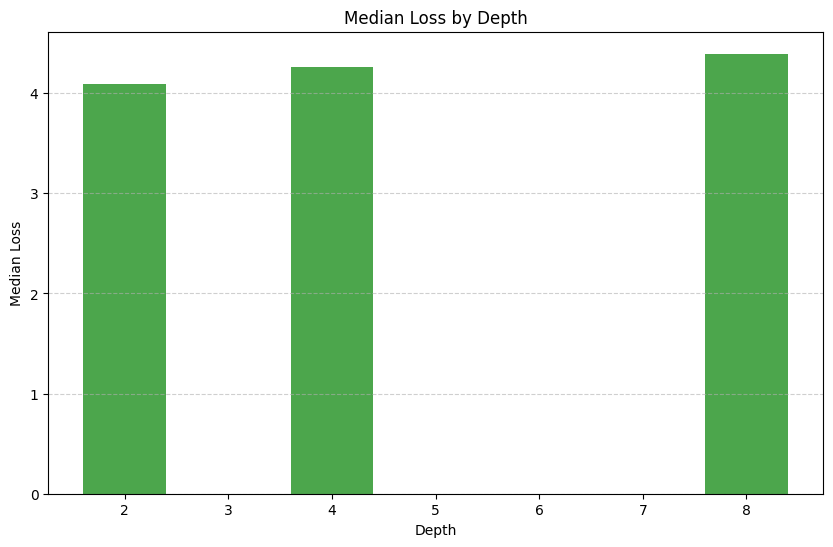

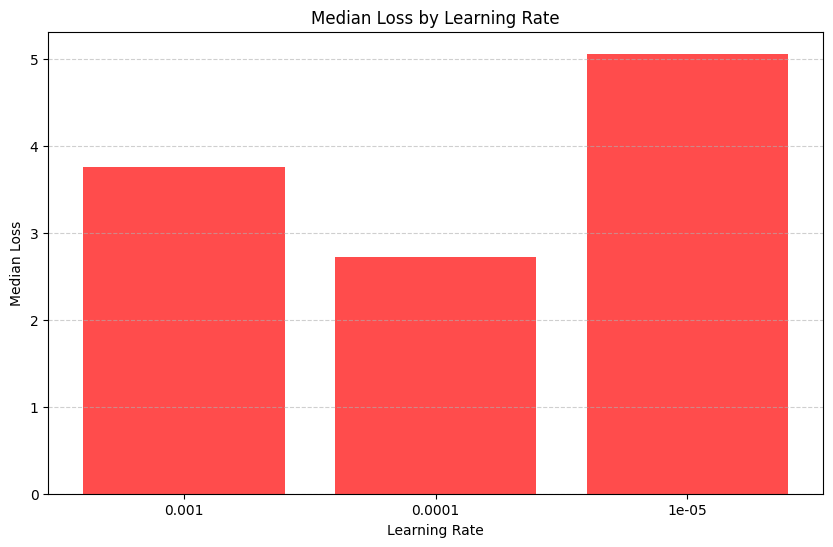

In [51]:
file_path = 'random_search_results_pinn_problem1.txt'
df = parse_pinn_results(file_path)

# Analyze the impact of each hyperparameter
# Group by activation function
act_fn_median = df.groupby("ActFn")["Loss"].median().sort_values()

# Group by width
width_median = df.groupby("Width")["Loss"].median().sort_index()

# Group by number of blocks
nblocks_median = df.groupby("Depth")["Loss"].median().sort_index()

# Group by learning rate
lr_median = df.groupby("LR")["Loss"].median().sort_index(ascending=False)

# Plotting
# Activation Function
plt.figure(figsize=(10, 6))
plt.bar(act_fn_median.index, act_fn_median, color="blue", alpha=0.7)
plt.title("Median Loss by Activation Function")
plt.ylabel("Median Loss")
plt.xlabel("Activation Function")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Width
plt.figure(figsize=(10, 6))
plt.bar(width_median.index, width_median, color="orange", alpha=0.7)
plt.title("Median Loss by Model Width")
plt.ylabel("Median Loss")
plt.xlabel("Width")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Depth
plt.figure(figsize=(10, 6))
plt.bar(nblocks_median.index, nblocks_median, color="green", alpha=0.7)
plt.title("Median Loss by Depth")
plt.ylabel("Median Loss")
plt.xlabel("Depth")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()

# Learning Rate
plt.figure(figsize=(10, 6))
plt.bar(lr_median.index.astype(str), lr_median, color="red", alpha=0.7)
plt.title("Median Loss by Learning Rate")
plt.ylabel("Median Loss")
plt.xlabel("Learning Rate")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()
